# Определение перспективного тарифа для телеком компании

Описание тарифов

Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Описание данных

Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
Таблица calls (информация о звонках):
id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

откроем предложанные датафреймы с информацией по звонкам,интернет трафику,сообщениям тарифам и пользователям. Изучим исходные данные

In [2]:

calls = pd.read_csv(r"/datasets/calls.csv")
internet = pd.read_csv(r"/datasets/internet.csv")
messages = pd.read_csv(r"/datasets/messages.csv")
tariffs = pd.read_csv(r"/datasets/tariffs.csv")
users = pd.read_csv(r"/datasets/users.csv")
first_list=[calls,internet,messages,tariffs,users]

for i in first_list:
    print(i.info())
    display(i)

    for j in i.columns:
        print()

        print("В колонке  {} зафиксированы следующие уникальные значения: {}.".format(j, i[j].unique()))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499



В колонке  id зафиксированы следующие уникальные значения: ['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219'].

В колонке  call_date зафиксированы следующие уникальные значения: ['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499



В колонке  Unnamed: 0 зафиксированы следующие уникальные значения: [     0      1      2 ... 149393 149394 149395].

В колонке  id зафиксированы следующие уникальные значения: ['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156'].

В колонке  mb_used зафиксированы следующие уникальные значения: [ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72].

В колонке  session_date зафиксированы следующие уникальные значения: ['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499



В колонке  id зафиксированы следующие уникальные значения: ['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183'].

В колонке  message_date зафиксированы следующие уникальные значения: ['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-2

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



В колонке  messages_included зафиксированы следующие уникальные значения: [  50 1000].

В колонке  mb_per_month_included зафиксированы следующие уникальные значения: [15360 30720].

В колонке  minutes_included зафиксированы следующие уникальные значения: [ 500 3000].

В колонке  rub_monthly_fee зафиксированы следующие уникальные значения: [ 550 1950].

В колонке  rub_per_gb зафиксированы следующие уникальные значения: [200 150].

В колонке  rub_per_message зафиксированы следующие уникальные значения: [3 1].

В колонке  rub_per_minute зафиксированы следующие уникальные значения: [3 1].

В колонке  tariff_name зафиксированы следующие уникальные значения: ['smart' 'ultra'].
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart



В колонке  user_id зафиксированы следующие уникальные значения: [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1

# Шаг 2. Подготовьте данные

Преобразуем столбец call_date в формат даты

In [3]:

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


Добавим столбец, отдельно отображающий месяц

In [4]:
calls['month']=calls['call_date'].dt.month
display(calls)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


уберем данные о пропущенных вызовах

In [5]:
calls_clear=calls.query("duration!=0.0")
display(calls_clear)

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


Основная цель данной работы- сравнение комерческой эффективности двух тарифов. Мы исследуем сценарии поведения потенциального клиента в условиях различной тарифной сетки. В части звонков нам необходимо убедиться: готов ли человек выйти за рамки тарифа и сколько в среднем говорит человек. При более жестких ограничениях потенциальный клиент может выбрать альтернативу звонку, например, разговор по скайпу с персонального компьютера. Пропущенные вызовы же, в свою очередь, могут оказаться холодным обзвоном страховых компаний, социальными опросами или просто ошибкой. Принятие их в качестве составляющей нашего анализа может привести к шумам в данных и ошибочному выводу.

Рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [6]:
calls_clear_pivot=calls_clear.pivot_table(index=['user_id', "month"], aggfunc={'id':'count', 'duration':'sum'}).reset_index()
calls_clear_pivot.columns=['user_id','month','summary_call_duration',"call_counts"]
display(calls_clear_pivot)


,user_id,month,summary_call_duration,call_counts
0,1000,5,150.06,17
1,1000,6,158.90,28
2,1000,7,318.80,41
3,1000,8,389.87,42
4,1000,9,440.14,46
...,...,...,...,...
3163,1498,10,232.63,30
3164,1499,9,64.65,8
3165,1499,10,429.91,44
3166,1499,11,576.50,62


Преобразуем столбец session_date в формат даты

In [7]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')
print(internet.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB
None


добавим столбец, отдельно отображающий месяц

In [8]:
internet['month']=internet['session_date'].dt.month
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


Удалим лишний столбец

In [9]:
internet = internet.drop(['Unnamed: 0'], axis=1)
display(internet)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


Рассчитаем объем израсходованного интернет-трафика по месяцам

In [10]:
internet_pivot=internet.pivot_table(index=['user_id', "month"], aggfunc={'mb_used':'sum'}).reset_index()
internet_pivot.columns=['user_id','month','summary_mb_used']
display(internet_pivot)

,user_id,month,summary_mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Преобразуем столбец message_date в формат даты

In [11]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


Добавим столбец, отдельно отображающий месяц

In [12]:
messages['month']=messages['message_date'].dt.month
display(messages)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Рассчитаем количество отправленных сообщений по месяцам

In [13]:
messages_pivot=messages.pivot_table(index=['user_id', "month"], aggfunc={'id':'count'}).reset_index()
messages_pivot.columns=['user_id','month','message_count']
display(messages_pivot)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Преобразуем столбец message_date в формат даты

In [14]:
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%dT')
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Обработаем пропуски в столбце churn_date  и преобразуем его в формат даты. Для этого примем небольшое допущение и заменим пропущенные даты на 2018-12-31. Так же создадим столбцы , показывающие месяца регистрации и завершения пользования тарифом.

In [15]:
users['churn_date'].fillna("2018-12-31", inplace = True)
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%dT')
users['month_churn_date']=users['churn_date'].dt.month
users['month_reg_date']=users['reg_date'].dt.month
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,12,8
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,12,5
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart,12,1
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart,12,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7


Объединим информацию по звонкам, интернет трафику и сообщениям в одну таблицу.

In [16]:
merged_table=calls_clear_pivot.merge(internet_pivot, how='outer',left_on=['user_id','month'], right_on=['user_id','month'])
merged_table=merged_table.merge(messages_pivot, how='outer',left_on=['user_id','month'], right_on=['user_id','month'])
display(merged_table)
print(merged_table.info())



,user_id,month,summary_call_duration,call_counts,summary_mb_used,message_count
0,1000,5,150.06,17.0,2253.49,22.0
1,1000,6,158.90,28.0,23233.77,60.0
2,1000,7,318.80,41.0,14003.64,75.0
3,1000,8,389.87,42.0,14055.93,81.0
4,1000,9,440.14,46.0,14568.91,57.0
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,11050.56,17.0
3210,1489,9,NaN,NaN,17206.30,32.0
3211,1489,10,NaN,NaN,19559.44,21.0
3212,1489,11,NaN,NaN,17491.56,20.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
summary_call_duration    3168 non-null float64
call_counts              3168 non-null float64
summary_mb_used          3203 non-null float64
message_count            2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB
None


Если информация по какому-либо пункту  в сводной таблице отсутствует, значит человек не использовал эту услугу в данный месяц.

In [17]:
merged_table.fillna(0, inplace = True)
display(merged_table)
print(merged_table.info())


,user_id,month,summary_call_duration,call_counts,summary_mb_used,message_count
0,1000,5,150.06,17.0,2253.49,22.0
1,1000,6,158.90,28.0,23233.77,60.0
2,1000,7,318.80,41.0,14003.64,75.0
3,1000,8,389.87,42.0,14055.93,81.0
4,1000,9,440.14,46.0,14568.91,57.0
...,...,...,...,...,...,...
3209,1489,8,0.00,0.0,11050.56,17.0
3210,1489,9,0.00,0.0,17206.30,32.0
3211,1489,10,0.00,0.0,19559.44,21.0
3212,1489,11,0.00,0.0,17491.56,20.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
summary_call_duration    3214 non-null float64
call_counts              3214 non-null float64
summary_mb_used          3214 non-null float64
message_count            3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB
None


Соединим общую таблицу с данными с таблицей, содержащей информацию о пользователях.

In [18]:
common_table=users.merge(merged_table, how='outer',left_on=['user_id'], right_on=['user_id'])
display(common_table)
print(common_table.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_mb_used,message_count
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,5.0,150.06,17.0,2253.49,22.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,6.0,158.90,28.0,23233.77,60.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,7.0,318.80,41.0,14003.64,75.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,8.0,389.87,42.0,14055.93,81.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,9.0,440.14,46.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,232.63,30.0,20579.36,42.0
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,64.65,8.0,1845.75,11.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,429.91,44.0,17788.51,48.0
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,576.50,62.0,17963.31,59.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               3216 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month_churn_date         3216 non-null int64
month_reg_date           3216 non-null int64
month                    3214 non-null float64
summary_call_duration    3214 non-null float64
call_counts              3214 non-null float64
summary_mb_used          3214 non-null float64
message_count            3214 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 402.0+ KB
None


Выполним проверку соответствуют ли даты, заявленные в отчетах, данным о регистрации пользователя.

In [19]:
common_table["check"]=(common_table["month"]<=common_table["month_churn_date"])&(common_table["month"]>=common_table["month_reg_date"])

display(common_table.query('check==False'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_mb_used,message_count,check
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12,NaN,NaN,NaN,NaN,NaN,False
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12,NaN,NaN,NaN,NaN,NaN,False


Как мы видим, некоторые пользователи зарегистрировались и сразу ушли от сотового оператора. Избавимся от этих строк.

In [20]:
common_table=common_table.query('check==True')
display(common_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_mb_used,message_count,check
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,5.0,150.06,17.0,2253.49,22.0,True
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,6.0,158.90,28.0,23233.77,60.0,True
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,7.0,318.80,41.0,14003.64,75.0,True
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,8.0,389.87,42.0,14055.93,81.0,True
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,9.0,440.14,46.0,14568.91,57.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,232.63,30.0,20579.36,42.0,True
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,64.65,8.0,1845.75,11.0,True
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,429.91,44.0,17788.51,48.0,True
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,576.50,62.0,17963.31,59.0,True


Округлим значения минут разговоров

In [21]:
common_table['summary_call_duration']=np.ceil(common_table['summary_call_duration'])
display(common_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_mb_used,message_count,check
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,5.0,151.0,17.0,2253.49,22.0,True
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,6.0,159.0,28.0,23233.77,60.0,True
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,7.0,319.0,41.0,14003.64,75.0,True
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,8.0,390.0,42.0,14055.93,81.0,True
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,9.0,441.0,46.0,14568.91,57.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,233.0,30.0,20579.36,42.0,True
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,65.0,8.0,1845.75,11.0,True
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,430.0,44.0,17788.51,48.0,True
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,577.0,62.0,17963.31,59.0,True


Определим количество пользователей на каждом тарифе

In [22]:
common_table_pivot=common_table.pivot_table(index=['tariff'], aggfunc={'user_id':'count'}).reset_index()
display(common_table_pivot)

,tariff,user_id
0,smart,2229
1,ultra,985


In [23]:
### Код ревьювера ###

user_ids = common_table.groupby('tariff')['user_id'].count()
user_ids

tariff
smart    2229
ultra     985
Name: user_id, dtype: int64

Определим функцию для расчета выручки сверх тарифных условий

In [24]:
def calk_revenue(df,volum,price):
    n=df-volum
    maximum=max([0,n])
    revenue=maximum*price
    return revenue


Переведем данные о использованном трафике в гигабайты.

In [25]:
common_table['summary_mb_used']=np.ceil((common_table['summary_mb_used']/1024))
common_table.columns=['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'month_churn_date', 'month_reg_date', 'month',
       'summary_call_duration', 'call_counts', 'summary_gb_used',
       'message_count', 'check']
display(common_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_gb_used,message_count,check
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,5.0,151.0,17.0,3.0,22.0,True
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,6.0,159.0,28.0,23.0,60.0,True
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,7.0,319.0,41.0,14.0,75.0,True
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,8.0,390.0,42.0,14.0,81.0,True
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,9.0,441.0,46.0,15.0,57.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,233.0,30.0,21.0,42.0,True
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,65.0,8.0,2.0,11.0,True
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,430.0,44.0,18.0,48.0,True
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,577.0,62.0,18.0,59.0,True


Рассчитаем выручку по звонкам

In [26]:
smart=common_table.query("tariff=='smart'")
smart["call_revenue"]=smart["summary_call_duration"].apply([lambda x:calk_revenue(x,500,3)])
display(smart)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_gb_used,message_count,check,call_revenue
8,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11,11.0,409.0,45.0,18.0,0.0,True,0.0
9,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11,12.0,392.0,47.0,14.0,0.0,True,0.0
10,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,6.0,111.0,14.0,11.0,4.0,True,0.0
11,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,7.0,205.0,21.0,18.0,11.0,True,0.0
12,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,8.0,270.0,37.0,20.0,13.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,233.0,30.0,21.0,42.0,True,0.0
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,65.0,8.0,2.0,11.0,True,0.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,430.0,44.0,18.0,48.0,True,0.0
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,577.0,62.0,18.0,59.0,True,231.0


Рассчитаем выручку по сообщениям

In [27]:
smart["mesage_revenue"]=smart["message_count"].apply([lambda x:calk_revenue(x,50,3)])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Расчитаем выручку по интернет трафику

In [28]:
smart["internet_revenue"]=smart["summary_gb_used"].apply([lambda x:calk_revenue(x,15,0.2)])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Расчитаем суммарную выручку по тарифу смарт

In [29]:
smart["summary_revenue"]=550+smart["call_revenue"]+smart["mesage_revenue"]+smart["internet_revenue"]
display(smart)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_gb_used,message_count,check,call_revenue,mesage_revenue,internet_revenue,summary_revenue
8,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11,11.0,409.0,45.0,18.0,0.0,True,0.0,0.0,0.6,550.6
9,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,12,11,12.0,392.0,47.0,14.0,0.0,True,0.0,0.0,0.0,550.0
10,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,6.0,111.0,14.0,11.0,4.0,True,0.0,0.0,0.0,550.0
11,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,7.0,205.0,21.0,18.0,11.0,True,0.0,0.0,0.6,550.6
12,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,12,6,8.0,270.0,37.0,20.0,13.0,True,0.0,0.0,1.0,551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,7,10.0,233.0,30.0,21.0,42.0,True,0.0,0.0,1.2,551.2
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,9.0,65.0,8.0,2.0,11.0,True,0.0,0.0,0.0,550.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,10.0,430.0,44.0,18.0,48.0,True,0.0,0.0,0.6,550.6
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,12,9,11.0,577.0,62.0,18.0,59.0,True,231.0,27.0,0.6,808.6


Рассчитаем выручку по звонкам тарифа ultra

In [30]:
ultra=common_table.query("tariff=='ultra'")
ultra["call_revenue"]=ultra["summary_call_duration"].apply([lambda x:calk_revenue(x,3000,1)])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Рассчитаем выручку по сообщениям тарифа ultra

In [31]:
ultra["mesage_revenue"]=ultra["message_count"].apply([lambda x:calk_revenue(x,1000,1)])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Расчитаем выручку по интернет трафику тарифа ultra

In [32]:
ultra["internet_revenue"]=ultra["summary_gb_used"].apply([lambda x:calk_revenue(x,30,0.15)])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Расчитаем суммарную выручку по тарифу ultra

In [33]:
ultra["summary_revenue"]=1950+ultra["call_revenue"]+ultra["mesage_revenue"]+ultra["internet_revenue"]
display(ultra)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_churn_date,month_reg_date,month,summary_call_duration,call_counts,summary_gb_used,message_count,check,call_revenue,mesage_revenue,internet_revenue,summary_revenue
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,5.0,151.0,17.0,3.0,22.0,True,0,0,0.00,1950.00
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,6.0,159.0,28.0,23.0,60.0,True,0,0,0.00,1950.00
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,7.0,319.0,41.0,14.0,75.0,True,0,0,0.00,1950.00
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,8.0,390.0,42.0,14.0,81.0,True,0,0,0.00,1950.00
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,5,9.0,441.0,46.0,15.0,57.0,True,0,0,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8,8.0,88.0,13.0,3.0,13.0,True,0,0,0.00,1950.00
3189,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8,9.0,767.0,95.0,33.0,82.0,True,0,0,0.45,1950.45
3190,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8,10.0,972.0,126.0,29.0,82.0,True,0,0,0.00,1950.00
3191,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,12,8,11.0,893.0,112.0,39.0,79.0,True,0,0,1.35,1951.35


# # Шаг 3. Проанализируйте данные

Определим функцию для расчета значений звонков, сообщений и трафика по месяцам.

In [34]:
def parameters(df):
    pivot=df.pivot_table(index=["month"], values=['summary_call_duration','summary_gb_used','message_count'],aggfunc=['sum','mean']).reset_index()
    pivot.columns=["month","call_sum","message_sum","gb_sum","call_mean","message_mean","mb_mean"]
    return pivot


Опредилим функцию для расчета дисперсии и стандартного отклонения

In [35]:
def disp_sta(df):
    row=['summary_call_duration','summary_gb_used','message_count']
    dict={}
    for i in row:
        disp=np.var(df[i]).round(1)
        dict["disp_"+i]=[disp]
        std=np.std(df[i]).round(1)
        dict["std_"+i]=[std]
    return pd.DataFrame(dict)


Определим функцию для построения гистограм плотности распределения метрик тарифов

In [36]:
def graf(df1,df2):
    list=['summary_call_duration','summary_gb_used','message_count']
    for i in list:
        df1[i]=df1[i].round(0)
        df2[i]=df2[i].round(0)
        
        plt.figure(figsize=(7,7))
        
        plt.subplot(121)
        plt.subplots_adjust(wspace=0.6, hspace=0)
        df1[i].hist(density=True,bins=20)
        plt.xlabel("smart_"+i,fontsize=15)
       
        

        plt.subplot(122)
        df2[i].hist(density=True,bins=20)
        plt.xlabel("ultra_"+i,fontsize=15)
        plt.show()

Альтернативная функция построения графиков

In [37]:
def graf2(df1,df2):
    list=['summary_call_duration','summary_gb_used','message_count']
    for i in list:
        common_table.query('tariff == "smart"')[i].hist(bins=50, alpha = 0.4, figsize=(10,6))
        common_table.query('tariff == "ultra"')[i].hist(bins=50, alpha = 0.4, figsize=(10,6))
        plt.xlabel(i,fontsize=15)
        plt.show()

Рассчитаем значения звонков, сообщений и трафика для тарифа smart

In [38]:
smart_param=parameters(smart)
display(smart_param)

,month,call_sum,message_sum,gb_sum,call_mean,message_mean,mb_mean
0,1.0,620.0,6579.0,297.0,18.235294,193.500000,8.735294
1,2.0,1397.0,16438.0,687.0,24.086207,283.413793,11.844828
2,3.0,2453.0,28362.0,1173.0,31.857143,368.337662,15.233766
3,4.0,3443.0,38838.0,1526.0,30.741071,346.767857,13.625000
4,5.0,4762.0,51565.0,2243.0,33.773050,365.709220,15.907801
5,6.0,5478.0,61283.0,2616.0,33.402439,373.676829,15.951220
6,7.0,6784.0,77587.0,3191.0,33.751244,386.004975,15.875622
7,8.0,7905.0,93616.0,3933.0,33.638298,398.365957,16.736170
8,9.0,8746.0,105303.0,4262.0,33.638462,405.011538,16.392308
9,10.0,9927.0,118412.0,4963.0,33.765306,402.761905,16.880952


Рассчитаем значения звонков, сообщений и трафика для тарифа ultra

In [39]:
ultra_param=parameters(ultra)
display(ultra_param)

,month,call_sum,message_sum,gb_sum,call_mean,message_mean,mb_mean
0,1.0,304.0,3648.0,119.0,33.777778,405.333333,13.222222
1,2.0,527.0,6747.0,288.0,21.958333,281.125000,12.000000
2,3.0,1195.0,17130.0,653.0,32.297297,462.972973,17.648649
3,4.0,1736.0,23780.0,933.0,31.563636,432.363636,16.963636
4,5.0,2536.0,32308.0,1298.0,37.850746,482.208955,19.373134
5,6.0,3505.0,38090.0,1591.0,41.726190,453.452381,18.940476
6,7.0,4536.0,46928.0,1866.0,49.846154,515.692308,20.505495
7,8.0,5183.0,51617.0,2097.0,48.439252,482.401869,19.598131
8,9.0,6013.0,58604.0,2213.0,52.286957,509.600000,19.243478
9,10.0,7187.0,64859.0,2468.0,58.430894,527.308943,20.065041


И так сделаем вывод из полученных данных: в обоих тарифах с каждым месяцем по всем трем параметрам возрастают суммарные показатели.
Это не удивительно,так как с каждым месяцем возрастает суммарное кол-во пользователей.
Среднее значение за месяц, в свою очередь, достигает пика примерно к июню во всех параметрах в обоих тарифах. Скорее всего, это можно обяснить тем,
что к этому времени формируется основной костяк целевых потребителей.

По абсолютным значениям тариф смарт сильно вырывается вперед. Это объясняется тем, что на него подписано в два раза больше людей.
По средним же показателям лидирует тариф ультра. И ситуация двоякая. Либо все люди подписанные на более дорогой тариф активнее им пользуются, 
либо средний показатель подвержен влиянию лишь группы активных пользователей.

Рассчитаем дисперсию и стандартное отклонение для тарифа smart

In [40]:
display(disp_sta(smart))

,disp_summary_call_duration,std_summary_call_duration,disp_summary_gb_used,std_summary_gb_used,disp_message_count,std_message_count
0,32378.4,179.9,33.0,5.7,796.5,28.2


Рассчитаем дисперсию и стандартное отклонение для тарифа ultra

In [41]:
display(disp_sta(ultra))

,disp_summary_call_duration,std_summary_call_duration,disp_summary_gb_used,std_summary_gb_used,disp_message_count,std_message_count
0,89866.4,299.8,97.0,9.8,2282.9,47.8


Среднее отклонение и дисперсия были расчитаны на общих датафреймах с учетом данных каждого пользователя по месяцам. Это было сделанно для выделение особых случаев, в обоих тарифах искажающих среднее арифметическое. Как и ожидалось, в тарифе ультра отклонение больше. Возможно, эти люди выходят за рамки тарифных условий и приносят деньги.

Проверим наше предположение на диаграмме плотности вероятности. Сравним как наши метрики соотносятся друг с другом. Построим гистограммы.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


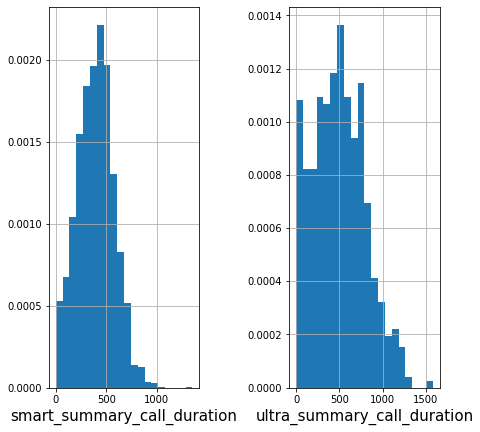

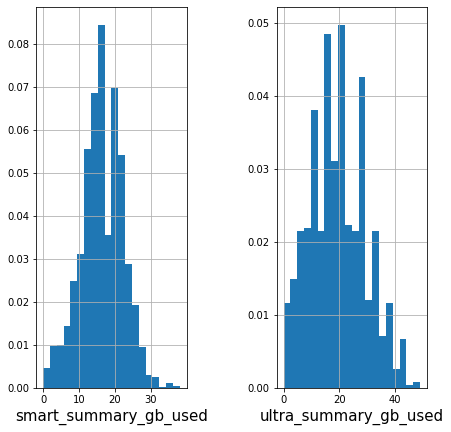

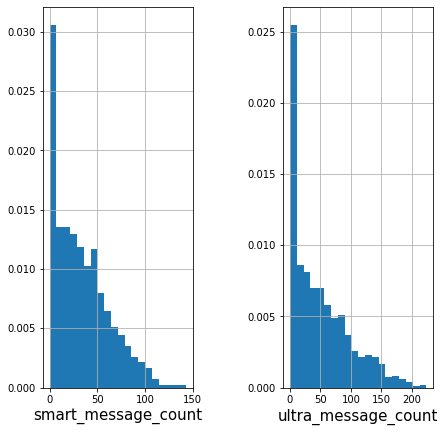

In [42]:
graf(smart,ultra)

Построение гистограмм на одном графике

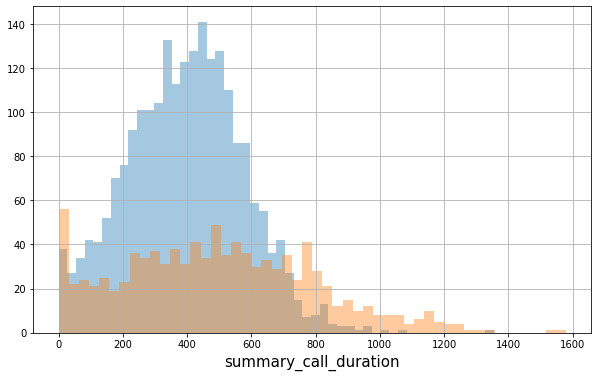

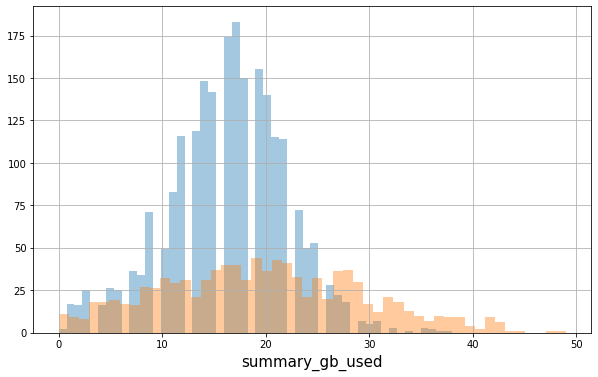

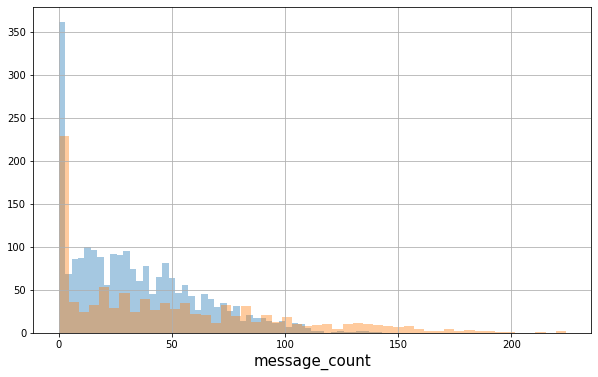

In [43]:
graf2(smart,ultra)

Мы видим, что вероятность получить средние показатели в тарифе смарт выше ( вероятность, что пользователь проговорит 500 минут, отправит 50 сообщений и потратит 15 гб трафика). Это логично, т.к. это граничные условия тарифа смарт. Диаграмма тарифа ультра шире и ниже, так как отклонение от среднего больше. Однако надо заметить, что среднее на тарифе ультра такое же, как и в смарт ( возможно, людям просто не нужно больше), а граничные условия выше. Следовательно эти отклонения могут и не приводить к переплате.

Распределения отправленных сообщений у обих тарифов стремятся к распределению Пуассона, имея четкую вершину в нуле и плаво спускаясь к большему кол-ву сообщений.
Распределения используемого трафика стремятся к нормальному распределению ( для тарифа ультра к скошенному в левую сторону нормальному)
Распределения по использованным минутам для обоих тарифов имеют форму скошенного нормального распределения(близкого к распределению Пирсона).в среднем нужно около 500 минут разговоров, 50 смс и 15 Гб трафика ( видимо, большее число люлям нужно реже). За границы этих значений выходят пользователи обоих тарифов, и у тарифа ультра дисперсия больше. Однако за границы тарифных условий чаще выходят пользователи тарифа смарт, т.к. ограничения жестче. 


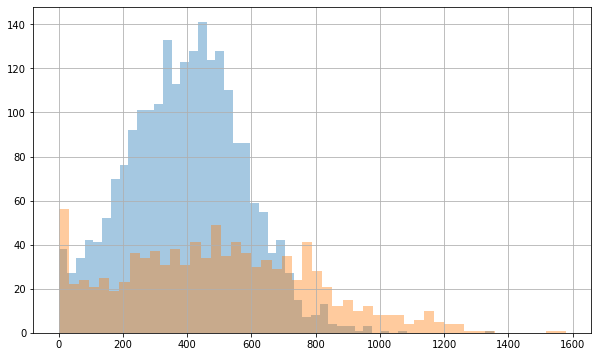

In [44]:
### Код ревьювера ###

common_table.query('tariff == "smart"')['summary_call_duration'].hist(bins=50, alpha = 0.4, figsize=(10,6))
common_table.query('tariff == "ultra"')['summary_call_duration'].hist(bins=50, alpha = 0.4, figsize=(10,6))

# Шаг 4. Проверьте гипотезы

Определим функцию для построения гистограм плотности распределения выручки по  тарифам

In [45]:
def graf_revenue(df1,df2):
    df1['summary_revenue']=df1['summary_revenue'].round(0)
    df2['summary_revenue']=df2['summary_revenue'].round(0)

    plt.figure(figsize=(7,7))

    plt.subplot(121)
    plt.subplots_adjust(wspace=0.6, hspace=0)
    df1['summary_revenue'].hist(density=True,bins=20)
    plt.xlabel("smart_summary_revenue",fontsize=15)



    plt.subplot(122)
    df2['summary_revenue'].hist(density=True,bins=20)
    plt.xlabel("ultra_summary_revenue",fontsize=15)
    plt.show()

Определим функцию для сравнения Москвы и других городов посредством проверки гипотезы о равенстве средних двух генеральных совокупностей и построении диаграмм.

In [46]:
def Moscow_compare(df):
    mos=df.query("city=='Москва'")
    other=df.query("city!='Москва'")
    alpha = 0.05
    results = st.ttest_ind(mos['summary_revenue'],other['summary_revenue'])
    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        
    mos['summary_revenue']=mos['summary_revenue'].round(0)
    other['summary_revenue']=other['summary_revenue'].round(0)

    plt.figure(figsize=(7,7))

    plt.subplot(121)
    plt.subplots_adjust(wspace=0.6, hspace=0)
    mos['summary_revenue'].hist(density=True,bins=20)
    plt.xlabel("Moscow_summary_revenue",fontsize=15)



    plt.subplot(122)
    other['summary_revenue'].hist(density=True,bins=20)
    plt.xlabel("other_cities_summary_revenue",fontsize=15)
    plt.show()


Построим плотности распределения выручки по  тарифам

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


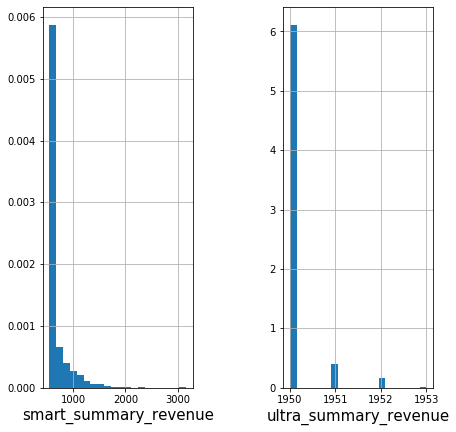

In [47]:
graf_revenue(smart,ultra)

Из диаграммы видно, что в обоих случаях вероятнее всего пользователь заплатит абонентскую плату.
Вероятность переплаты за услуги сверх тарифных условий выше в тарифе смарт (диаграмма плавно спускается вниз, напоминая распределения Пуассона). Это не удивительно, ведь условия переплаты в этом тарифе гораздо строже.
На тарифе ультра переплачивает тот самый кластер людей, который мы наблюдали в виде высоких значений дисперсии в предыдущем пункте. Однако тарифный план включает в себя большой запас минут, сообщений и мб, и привысить лимит сложно.
По итогу мы видим, что получить с человека 2000 р вероятнее на тарифе ультра. 

Проверим гипотезу о равенстве средних двух генеральных совокупностей. Нулевая гипотеза:средняя выручка на человека на обоих тарифах равна. Альтернативная гипотеза:средняя выручка на человека в рассматриваемых тарифах различается.  Значение alpha примем 0.01.

In [48]:
alpha = 0.01
results = st.ttest_ind(smart['summary_revenue'],ultra['summary_revenue'],equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтверждена. С вероятностью 99% выручки по клиентам с двух тарифов не будут равны. Значит выгоднее иметь больше клиентов на тарифе ультра.

Сравним выручку тарифа смарт в Москве и в других городах. Нулевая гипотеза - средняя выручка на человека в Москве и других городах не отличается. Альтернативная гипотеза- средняя выручка на человека в тарифе смарт в Москве и в остальных городах различная.

p-значение: 0.28305917429387234
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


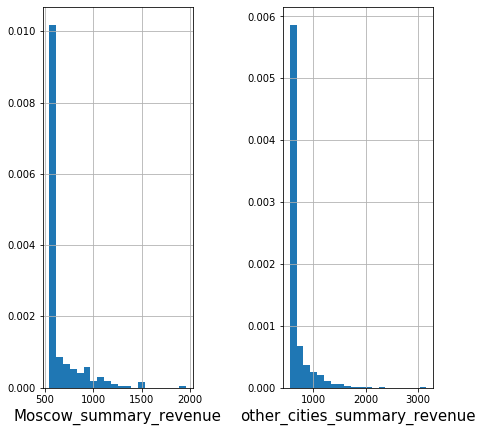

In [49]:
Moscow_compare(smart)

Средняя выручка на человека в Москве и других городах с вероятностью 95% не отличается.

Сравним выручку тарифа ультра в москве и в других городах. Нулевая гипотеза - средняя выручка на человека в Москве и других городах не отличается. Альтернативная гипотеза- средняя выручка на человека в тарифе ультра в Москве и в остальных городах различная.

p-значение: 0.9806984733757851
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


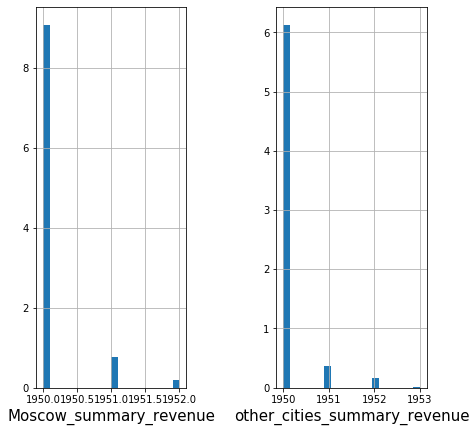

In [50]:
Moscow_compare(ultra)

Средняя выручка на человека в Москве и других городах с вероятностью 95% не отличается.

# Шаг 5. Напишите общий вывод

Мы сравнили два тарифа смарт и ультра. Первый имеет более низкую абонентскую плату и умеренные ограничения по тарифу. Тариф ультра, в свою очередь, имеет высокую абонентскую плату и широкие возможности использования включенных условий. Суммарная выручка больше у тарифа смарт, это объясняется тем, что большее число людей пользуются этим тарифом.
У обоих тарифов с начала года общая суммарная выручка росла, а средняя за месяц достигла пика к лету. Это обясняется тем, что количество пользователей прибавлялось, но основной костяк сформировался к июгю. Дисперсия больше у тарифа ультра. Однако необходимо заметить, что среднее использование минут, смс и мбт у тарифов схожи. Это обясняется тем, что большинству людей хватает этого кол-ва. Не смотря на большую дисперсию, в тарифе ультра основная выручка идет из-за абонентской платы, а не превышения тарифных условий. Это объясняется широким лимитом этогшо тарифа. 
По итогу тариф ультра из-за высокой абонентской платы оказался выгодней. Менеджменту следует превлечь больше средств на его рекламу.
Выручка в различных городах и в Москве с вероятностью 95 % различатся не будет.